In this tutorial, we would like to demonstrate how to plot non-seismic data like a velocity model. This tutorial requires the __seisio__ package to be available (in order to read field data). Also, the (public domain) test data needs to be available, see the file README in the examples/data folder. If you have another SEG-Y I/O package installed, you could alternatively use it and adjust the corresponding lines below. First, import the required modules:

In [1]:
import logging
import numpy as np

import sys
sys.path.insert(1, '../')

import seisplot
import seisio

logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s', force=True)

We would like to read, for instance, a shot gather from Line_001.sgy. In order to do so, we create an instance of a seisio reader object and afterwards an index for the data. Groups are formed by a common `fldr` trace header mnemonic, and within each group the traces are sorted by the `tracf` trace header mnemonic. We filter all traces and exclude traces that aren't marked as "live seismic data" (`trid` is one).

In [2]:
sio = seisio.input("data/Line_001.sgy")
sio.create_index(group_by="fldr", sort_by="tracf", filt=(lambda x: x["trid"] == 1))

INFO: Input file: data/Line_001.sgy
INFO: SEG-Y textual file header encoding looks to be 'EBCDIC' (best guess).
INFO: Input file endianess looks to be '>' (best guess).
INFO: SEG-Y revision: original SEG-Y conforming to 1975 standard.
INFO: Data sample format: 4-byte IBM floating-point.
INFO: Number of additional textual header records: 0.
INFO: Number of trailer stanza records: 0.
INFO: SEG-Y trace header extension 1 is not present.
INFO: Number of user-defined trace headers: 0
INFO: Byte offset of first trace relative to start of file: 3600 bytes.
INFO: Number of samples per data trace: 1501.
INFO: Sampling interval: 2000 (unit as per SEG-Y standard).
INFO: Number of data traces in file: 71284.
INFO: Delay (on first trace): 0 (unit as per SEG-Y standard).
INFO: Reading all 71284 trace headers from disk...
INFO: Reading all headers took 0.051 seconds.
INFO: Ensemble lookup index has filter applied.
INFO: Created lookup index for ['fldr'] (order '>').
INFO: Number of ensembles: 251


Now we can read one of the shot gathers, let's try a central one:

In [3]:
key = sio.ensemble_keys[sio.ne//2]   # key is a tuple
section = sio.read_ensemble(key)

INFO: Reading ensemble(s) '(356,)'.
INFO: Reading 282 trace(s) from disk starting at trace 35502...


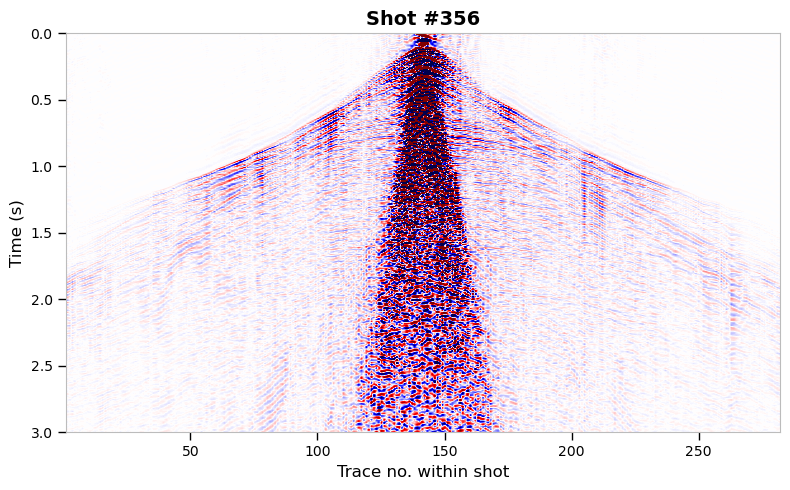

In [4]:
fig, ax = seisplot.plot(section, perc=98, width=8, height=5, haxis="tracf",
                        hlabel="Trace no. within shot", vlabel="Time (s)", title=f"Shot #{key[0]}")

As expected and often the case for land data, the ground roll dominates in terms of amplitudes. Let's use a trace-normalized display to better visualize these raw data:

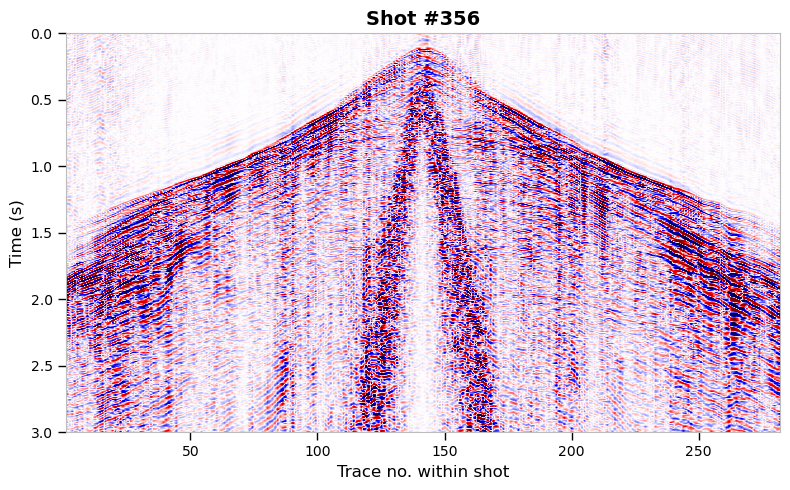

In [5]:
fig, ax = seisplot.plot(section, perc=98, width=8, height=5, haxis="tracf", normalize="trace",
                        hlabel="Trace no. within shot", vlabel="Time (s)", title=f"Shot #{key[0]}")

When using wiggle plots, the traces are displayed at their true horizontal axis position. To demonstrate this, let's create another ensemble index but exclude traces around the shot position. Read one of the ensembles (again, we just use the central ensemble in this example) and plot it as wiggle plot. In case of offsets being available in the trace headers, we would obviously use that header to display the data. The data have no offsets available yet, though. A navigation merge would have to be done first.

In [6]:
sio.create_index(group_by="fldr", sort_by="tracf", 
                 filt=(lambda x: np.logical_and(np.logical_or(x["tracf"] < 110, x["tracf"] > 170), x["trid"] == 1)))
key = sio.ensemble_keys[sio.ne//2]   # key is a tuple
section = sio.read_ensemble(key)

INFO: Reading all 71284 trace headers from disk...
INFO: Reading all headers took 0.067 seconds.
INFO: Ensemble lookup index has filter applied.
INFO: Created lookup index for ['fldr'] (order '>').
INFO: Number of ensembles: 251
INFO: Reading ensemble(s) '(356,)'.
INFO: Reading 221 specific trace(s) from disk...


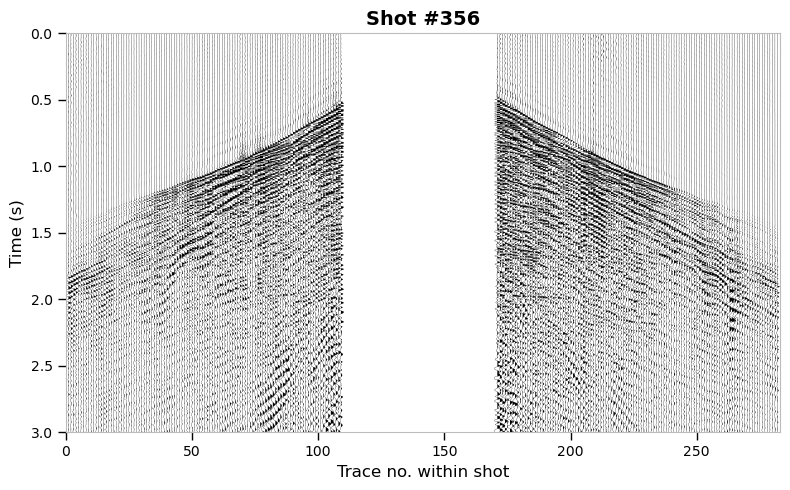

In [7]:
fig2, ax2 = seisplot.plot(section, plottype="wiggle", perc=98, width=8, height=5, haxis="tracf", 
                          hlabel="Trace no. within shot", vlabel="Time (s)", title=f"Shot #{key[0]}")